In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
label_data = pd.read_csv('C:/윤용완/성균관대학교/4학년/2학기/스마트팩토리캡스톤디자인2/04. Dataset_Molding/dataset/labeled_data.csv')

In [3]:
label_data['EQUIP_NAME'].value_counts()

650톤-우진2호기    7992
650톤-우진          2
1800TON-우진       2
Name: EQUIP_NAME, dtype: int64

In [4]:
label_data['PART_NAME'].value_counts()

CN7 W/S SIDE MLD'G RH        3371
CN7 W/S SIDE MLD'G LH        3365
RG3 MOLD'G W/SHLD, RH         628
RG3 MOLD'G W/SHLD, LH         628
JX1 W/S SIDE MLD'G RH           2
SP2 CVR ROOF RACK CTR, RH       2
Name: PART_NAME, dtype: int64

In [9]:
def make_input(data, machine_name, product_name):
    machine_ = data['EQUIP_NAME'] == machine_name
    product_ = data['PART_NAME'] == product_name
    data = data[machine_ & product_]
    
    #불필요하다고 판단된 columns
    #pandas package의 라이브러리인 'drop'을 통해 지정한 열 제거
    
    data.drop(['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'Reason', 'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME',
              'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_5', 'Mold_Temperature_6',
              'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9', 'Mold_Temperature_10',
               'Mold_Temperature_11', 'Mold_Temperature_12'], axis=1, inplace=True)
    return data

In [10]:
machine_name = "650톤-우진2호기"

product_name = ["CN7 W/S SIDE MLD'G LH", "CN7 W/S SDIE MLD'G RH", "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH"]

cn7lh = make_input(label_data, machine_name, product_name[0])

cn7rh = make_input(label_data, machine_name, product_name[1])

rg3lh = make_input(label_data, machine_name, product_name[2])

rg3rh = make_input(label_data, machine_name, product_name[3])

cn7 = pd.concat([cn7lh, cn7rh], ignore_index=True)
rg3 = pd.concat([rg3lh, rg3rh], ignore_index=True)

rg3.drop(['Plasticizing_Position'], axis=1, inplace=True)

C:\Users\YYW\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
cn7['PassOrFail'] = cn7['PassOrFail'].replace('Y', 0).replace('N', 1)

In [13]:
cn7.describe()

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,...,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.0,3365.000000,3365.000000,...,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.000000,3365.0,3365.000000,3365.000000,3365.000000
mean,0.004755,9.578969,4.449094,16.818666,59.546503,7.114247,653.439936,0.0,68.387060,645.240035,...,275.982853,275.149628,274.873135,270.301011,254.933254,229.974384,0.0,66.679673,22.073997,23.472363
std,0.068801,0.174669,0.137826,0.280211,0.353655,0.071614,0.108597,0.0,0.613708,39.791267,...,2.185455,1.790302,1.747966,1.923955,1.076465,0.411868,0.0,2.335884,1.172203,1.370904
min,0.000000,9.360000,3.350000,16.469999,58.840000,6.070000,653.390015,0.0,59.770000,69.639999,...,244.699997,249.000000,249.600006,244.800003,239.699997,224.600006,0.0,38.700001,19.100000,20.600000
25%,0.000000,9.530000,4.420000,16.629999,59.480000,7.120000,653.429993,0.0,68.320000,647.989990,...,275.799988,275.000000,274.799988,269.700012,254.800003,229.800003,0.0,65.599998,21.200001,22.600000
50%,0.000000,9.570000,4.450000,16.820000,59.520000,7.120000,653.429993,0.0,68.360001,647.989990,...,276.100006,275.299988,275.000000,270.399994,255.000000,230.000000,0.0,67.000000,21.900000,23.299999
75%,0.000000,9.600000,4.480000,16.910000,59.540001,7.120000,653.440002,0.0,68.510002,647.989990,...,276.399994,275.500000,275.200012,271.100006,255.199997,230.100006,0.0,67.800003,22.799999,24.200001
max,1.000000,13.390000,8.270000,21.100000,64.349998,7.180000,655.000000,0.0,68.860001,647.989990,...,277.899994,276.500000,276.000000,272.399994,256.299988,230.699997,0.0,70.599998,25.299999,27.799999


<AxesSubplot:>

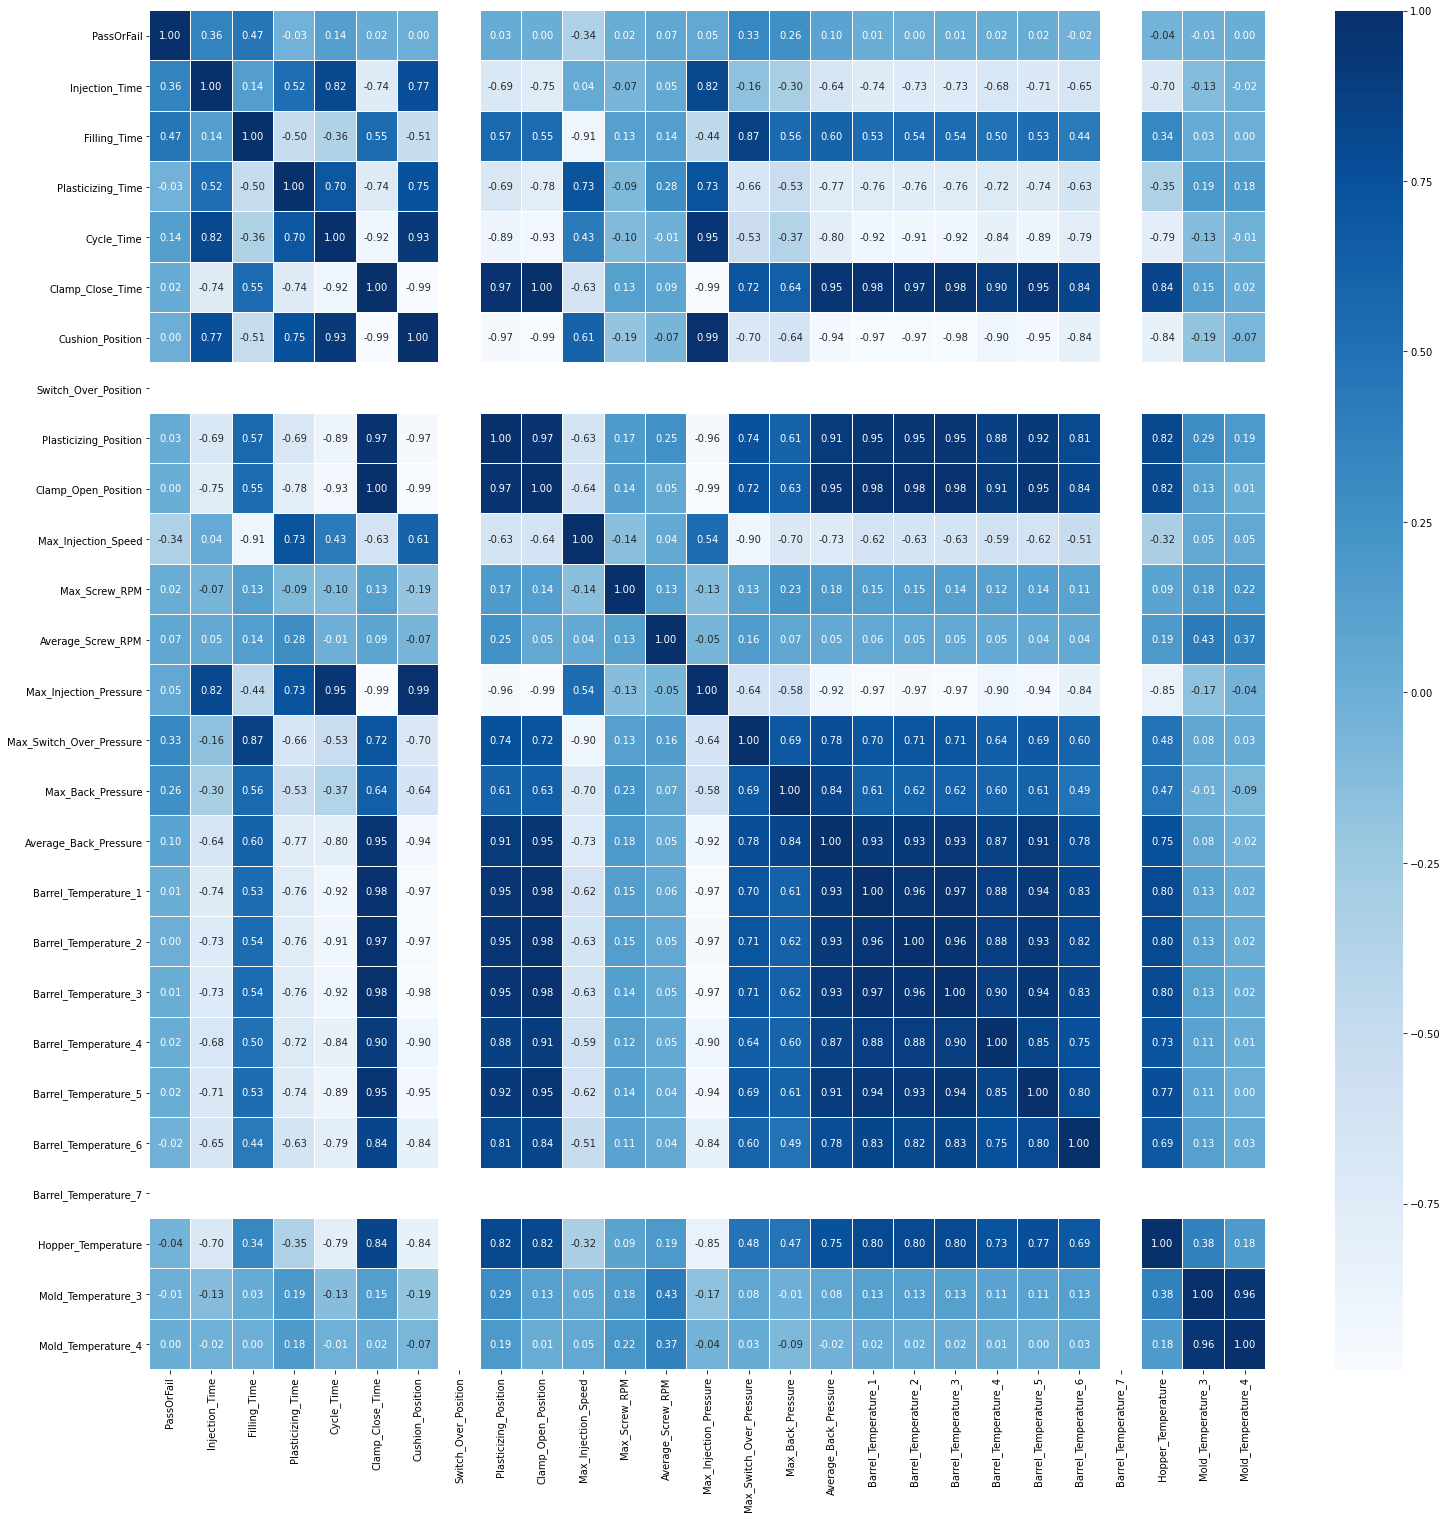

In [14]:
plt.subplots(figsize=(25,25))
sns.heatmap(data=cn7.corr(), linewidths=0.1, annot=True, fmt='.2f', cmap='Blues')

IndexError: list index out of range

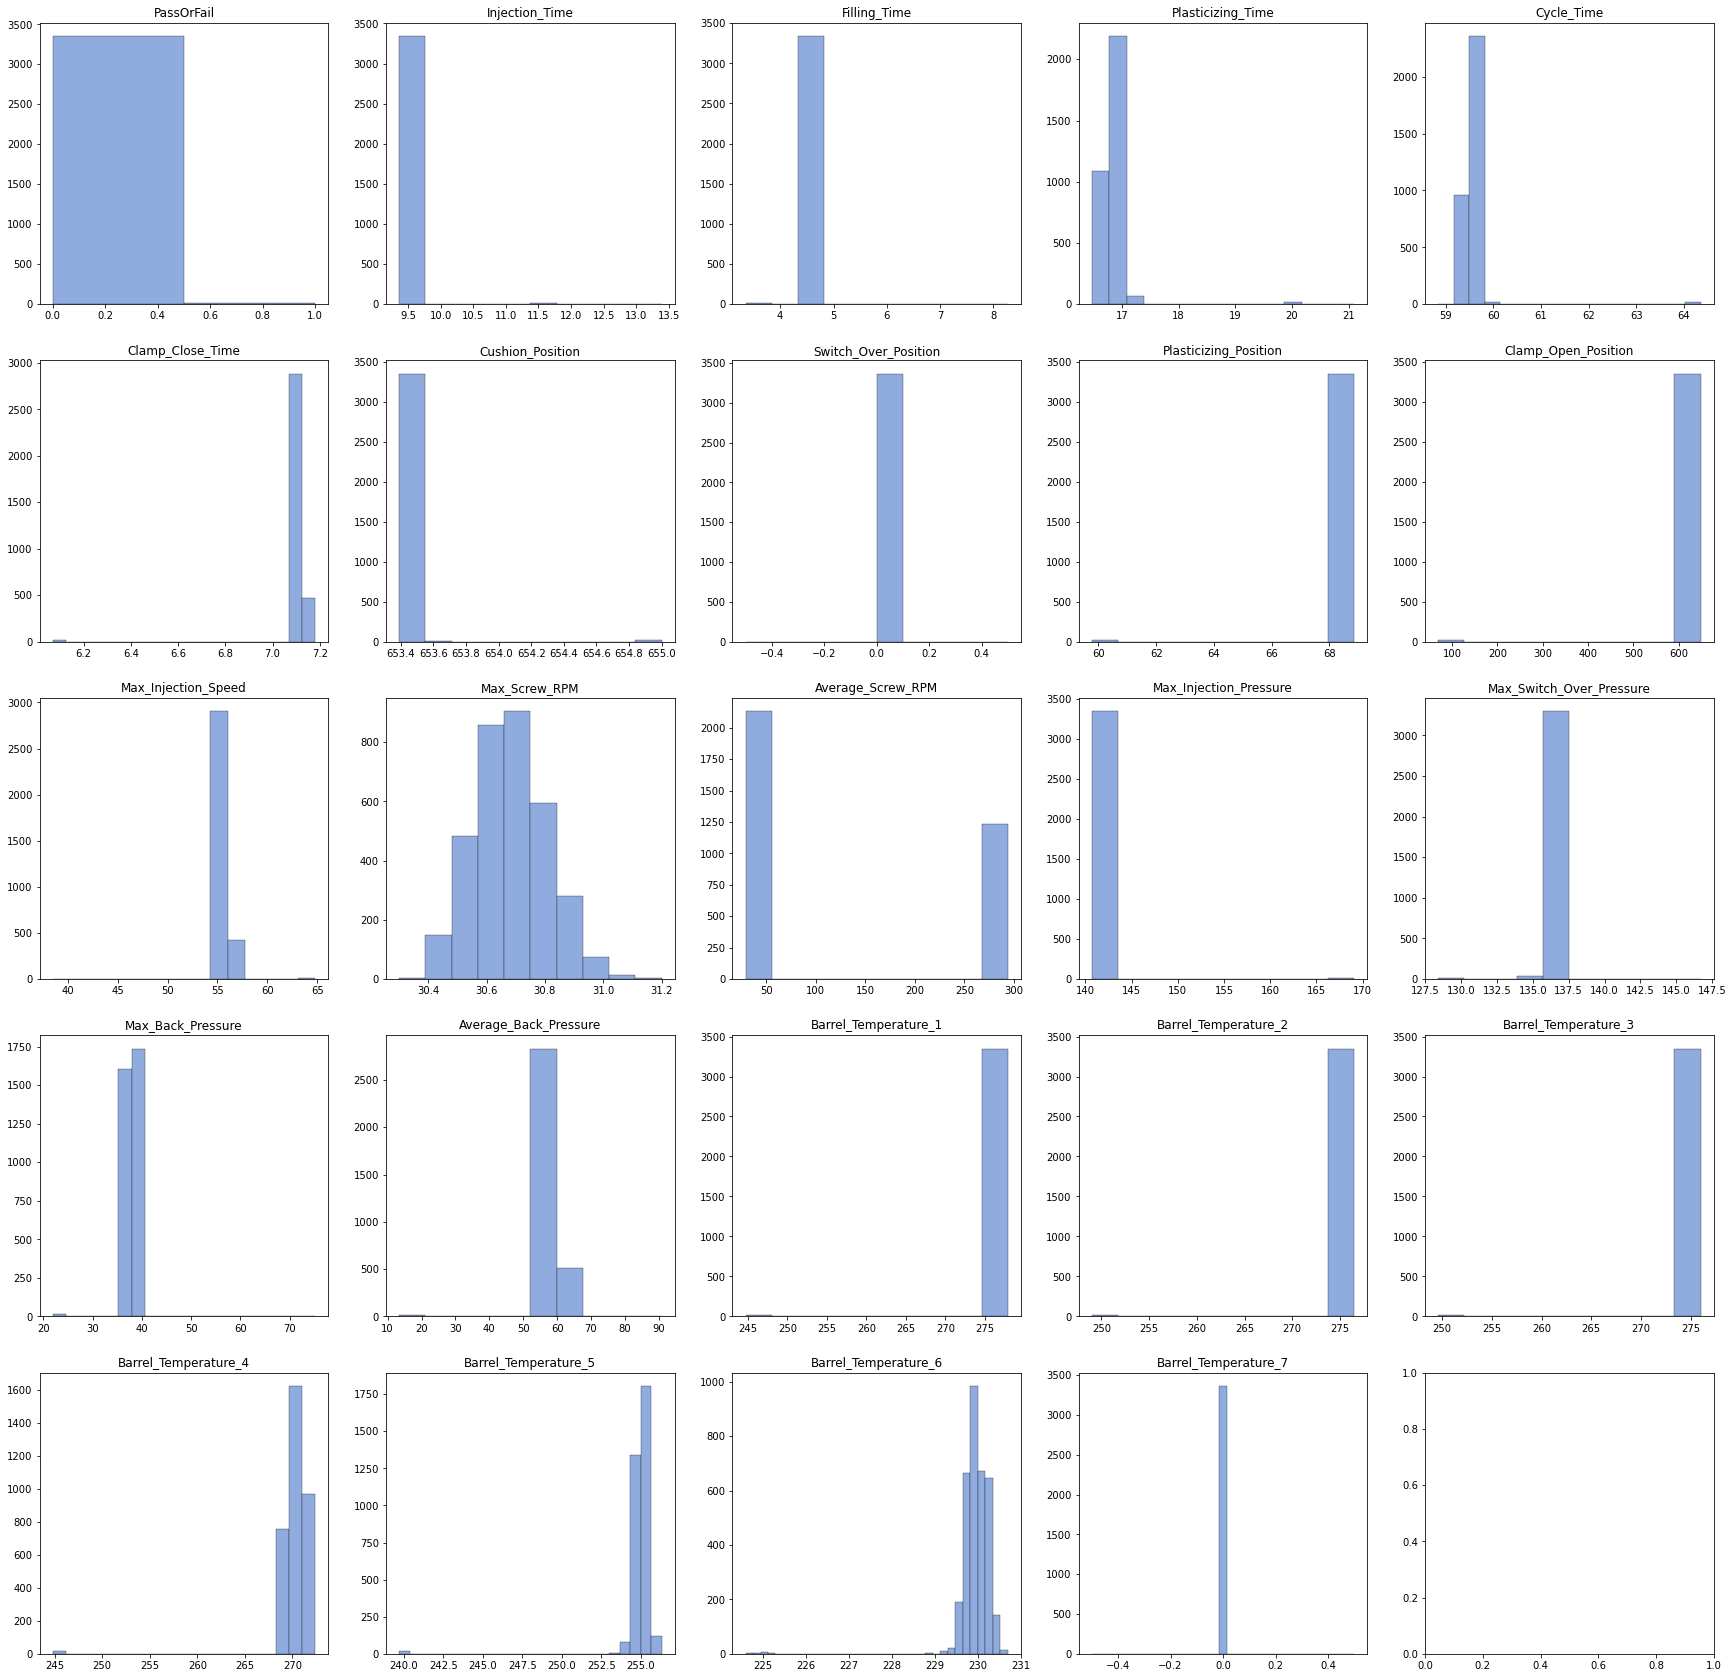

In [16]:
plt.figure(figsize=(30,30))

# 각 변수의 막대그래프 개수
bin=[2,10,10,15,17,20,10,10,10,10,15,10,10,10,10,20,10,10,10,10,20,25,35,35]

for index, value in enumerate(cn7):
    sub = plt.subplot(5, 5, index + 1)
    sub.hist(cn7[value], bins = bin[index], facecolor = (144/255,171/255,221/255), linewidth=.3, edgecolor='black')
    plt.title(value)